# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Q: Is the distribution of body temperatures normal?

Yep! Because the distribution matches up well with a theoretically perfect normal distribution of the same data, we can confirm that this distribution is normal.

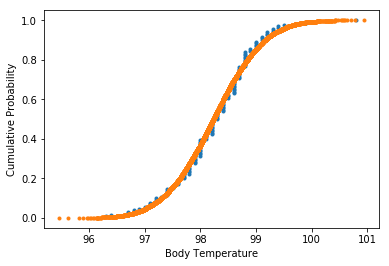

In [3]:
# Build a normal distribution using the mean and std of df.temperature
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
samples = np.random.normal(mean, std, size=10000)

# Calculate an ECDF for the theoretical normal distribution
n_theor = len(samples)
y_theor = np.arange(1, n_theor + 1) / n_theor
x_theor = np.sort(samples)

# Calculate an ECDF for the underlying distribution we intend to test
n = len(df['temperature'])
y = np.arange(1, n + 1) / n
x = np.sort(df['temperature'])

# Plot, label, and show
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature')
_ = plt.ylabel('Cumulative Probability')

plt.show()

### Q: Is the sample size large? Are the observations independent?

Each individual is measured once only, so observations are independent. Meanwhile, for tests about a population mean, samples over 100 are considered large enough. This sample is 130, so it is plenty large.

In [4]:
print(len(df))

130


### Is the true population mean really 98.6 degrees F?
No, as the p-statistic shows below, there is a near-zero percent chance of Wunderlich getting this data if the mean is actually 98.6.

In [5]:
size = 10000

# Shift the data so that the mean is the mean is 98.6. We will assume that the actual mean of our data
# is this figure, and see what the probability is that, given this mean, Wunderlich's data would be collected.
data_shift = df.temperature - np.mean(df.temperature) + 98.6

observed_test = np.mean(df.temperature)
print(observed_test)

# Generate replicates
bs_replicates = np.empty(size)

for i in range(size):
    bs_replicates[i] = np.mean(np.random.choice(data_shift, size=len(data_shift)))

# Calculate probability of a shifted bootstrap sample having a value at least as low as our observed mean.
p = np.sum(bs_replicates <= observed_test) / size
print('p-statistic is ' + str(p))

98.2492307692
p-statistic is 0.0


### Would you use a one-sample or two-sample test? Why?
One-sample, as we are given only a mean to compare to, and no underlying data for that mean.
### In this situation, is it appropriate to use the t or z statistic?
Z-statistic works fine here because we have a sample size over thirty, so the distribution of the z-statistic will be normal.
### Now try using the other test. How is the result be different? Why?
I'm on V4 curriculum which no longer asks this, so I'm not sure what to say, but I really don't want to switch back to V3 and watch a bunch of Khan Academy videos to figure it out. I hope this is a reasonable answer, hacker statistics forever.

### Q: At what temperature should we consider someone's temperature to be "abnormal"?
As shown below, anything below 98.08 or above 98.42 should be considered abnormal as it would fall outside of the 99% confidence interval.

In [6]:
# create an array of replicate means
replicates = np.empty(10000)
for x in range(10000):
    replicates[x] = np.mean(np.random.choice(df.temperature, len(df.temperature)))

# find the confidence 99% confidence interval in the replicate means
CI = np.percentile(replicates, [0.5,99.5])

# display results
print(CI)

[ 98.08384615  98.41230769]


### Q: Is there a significant difference between males and females in normal temperature?

Yes, women have higher body temperatures, with a p-statistic of 0.01. However, even the mean for females is significantly lower than 98.6.

In [7]:
# initialize a place to store our replicates and the female and male temperature data from df.
perm_replicates = np.empty(10000)
fem = df[df['gender'] == 'F']['temperature']
men = df[df['gender'] == 'M']['temperature']

# generate 10,000 permutation replicates
for x in range(10000):
    perm_sample = np.random.permutation(np.concatenate((fem, men)))
    perm_sample_fem = perm_sample[:len(fem)]
    perm_sample_men = perm_sample[len(fem):]
    
    perm_replicates[x] = np.mean(perm_sample_fem) - np.mean(perm_sample_men)
    
# calculate a p-stat by comparing the difference in means in the original sample against the permutation replicates
p_stat = np.sum(perm_replicates > (np.mean(fem) - np.mean(men))) / len(perm_replicates)

print("p-statistic is " + str(p_stat))

p-statistic is 0.0124


### What test did you use and why?

I did some EDA on the data and saw that women had a higher mean, suggesting there may be a statistically significant difference. I used a null hypothesis permutation test as it was easy to plugin what we needed to test, i.e. a difference of means. If a large share of the permutations had larger differences-of-means than the sample gathered, then our null hypothesis that the means are identical would be considered likely. The results instead showed a very low probability of getting such a difference in means if we continued sampling the population.

### Write a story with your conclusion in the context of the original problem.

I kind of already wrote some of the story, but the basic takeaway is that women appear to have higher body temperatures than men. A situation in which women make up a larger share of the tested sample may yield a higher mean body temperature, but it is still not likely a significant difference in a *practical* sense.

In [8]:
print('The ' + str(len(men)) + ' men have a mean body temp of ' + str(np.mean(men)))
print('The ' + str(len(fem)) + ' women have a mean body temp of ' + str(np.mean(fem)))

The 65 men have a mean body temp of 98.1046153846
The 65 women have a mean body temp of 98.3938461538
